   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
st

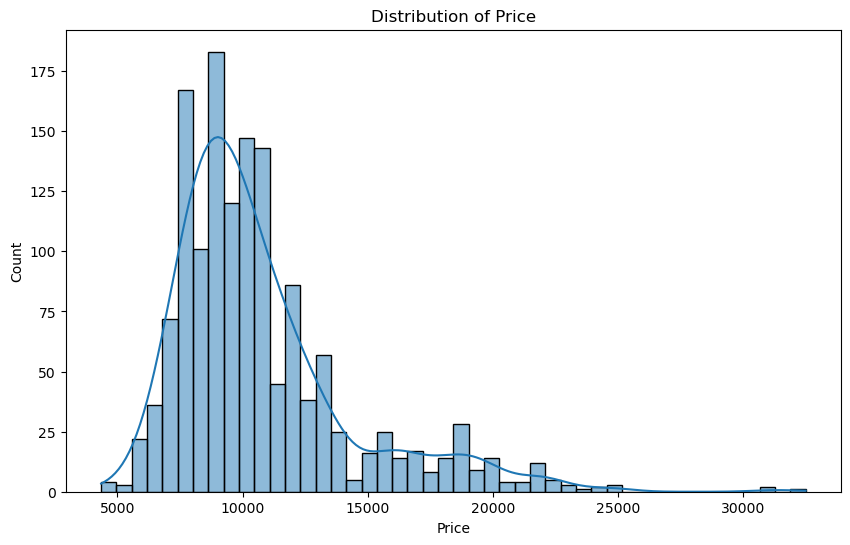

<Figure size 1500x1000 with 0 Axes>

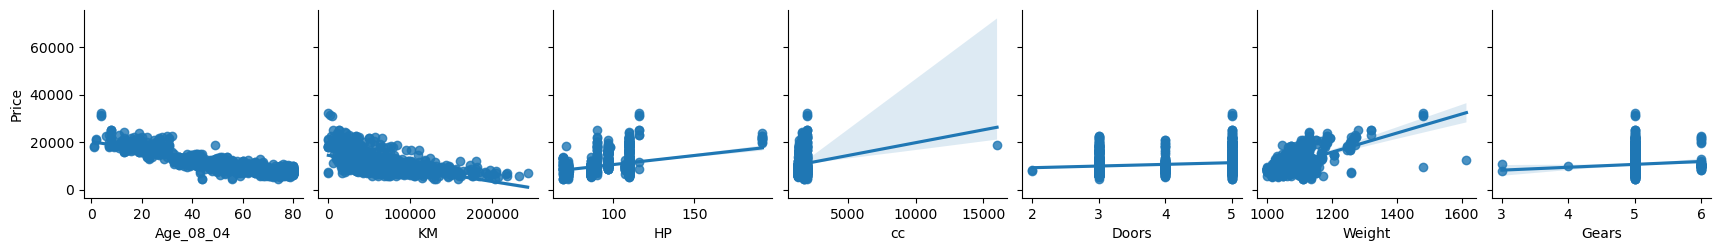

Model: LinearRegression()
Mean Squared Error: 1978577.5478981633
R^2 Score: 0.8517118444220815
Model: Ridge()
Mean Squared Error: 1978759.8556374642
R^2 Score: 0.851698181031209
Model: Lasso(alpha=0.1)
Mean Squared Error: 1978542.9912240638
R^2 Score: 0.8517144343359672


'\nMulticollinearity can be addressed using techniques such as:\n- Removing highly correlated predictors.\n- Using dimensionality reduction techniques like PCA.\n- Applying regularization techniques like Ridge regression, which penalizes the magnitude of the coefficients.\n'

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na option is deprecated")
# Load the dataset
file_path = 'D:/Data science ass/6/MLR/ToyotaCorolla - MLR.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Data Cleaning and EDA
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Visualize relationships between numerical features and the target variable
plt.figure(figsize=(15, 10))
sns.pairplot(data, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight', 'Gears'], y_vars='Price', kind='reg')
plt.show()

# Encode categorical variables
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

# Data preprocessing
X = data.drop(['Price'], axis=1)
y = data['Price']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
numeric_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Gears']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Model Building
def build_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {model}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    
    return pipeline

# Model 1: Linear Regression
lr = LinearRegression()
lr_model = build_and_evaluate_model(lr, X_train, X_test, y_train, y_test)

# Model 2: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge_model = build_and_evaluate_model(ridge, X_train, X_test, y_train, y_test)

# Model 3: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso_model = build_and_evaluate_model(lasso, X_train, X_test, y_train, y_test)

# Apply Lasso and Ridge methods on the model
# Note: Lasso and Ridge models are already evaluated above.

# Interview Questions

# 1. Normalization & Standardization
"""
Normalization refers to scaling the data to a range of [0, 1] or [-1, 1]. Standardization refers to scaling the data to have a mean of 0 and a standard deviation of 1. These techniques are helpful because they ensure that each feature contributes equally to the model, which improves the model's performance and training stability.
"""

# 2. Addressing Multicollinearity
"""
Multicollinearity can be addressed using techniques such as:
- Removing highly correlated predictors.
- Using dimensionality reduction techniques like PCA.
- Applying regularization techniques like Ridge regression, which penalizes the magnitude of the coefficients.
"""


1. What is Normalization & Standardization and how is it helpful?
Normalization and Standardization are techniques used to rescale and adjust the features of a dataset to ensure they have similar scales and distributions, which is often crucial for the performance of machine learning algorithms.

Normalization:

Definition: Normalization scales the data to a specific range, typically [0, 1].
 
Usefulness: This is particularly useful in algorithms like k-nearest neighbors (KNN) and neural networks, where the distance between data points affects the model’s performance. Normalization ensures that features with larger ranges do not dominate those with smaller ranges.
Standardization:

Definition: Standardization transforms the data so that it has a mean of 0 and a standard deviation of 1.

Usefulness: Standardization is helpful for algorithms that assume the data follows a Gaussian distribution, such as logistic regression, linear regression, and support vector machines (SVMs). It ensures that each feature contributes equally to the model.

2. What techniques can be used to address multicollinearity in multiple linear regression?
   
Multicollinearity occurs when independent variables in a multiple linear regression model are highly correlated, making it difficult to determine the individual effect of each variable on the dependent variable.

To address multicollinearity:

Remove Highly Correlated Variables:

Identify and remove one or more of the variables that are highly correlated. Tools like the Variance Inflation Factor (VIF) can help identify these variables.

Principal Component Analysis (PCA):

Use PCA to transform correlated variables into a set of uncorrelated components. These components can then be used in the regression model, reducing multicollinearity.

Ridge Regression (L2 Regularization):

Introduce a penalty to the regression coefficients proportional to their squared magnitude. This shrinks the coefficients and can reduce the impact of multicollinearity by spreading the weight more evenly across predictors.

Lasso Regression (L1 Regularization):

Apply Lasso regression, which penalizes the absolute value of the coefficients. This can reduce some coefficients to zero, effectively performing feature selection and addressing multicollinearity.

Partial Least Squares (PLS) Regression:

PLS considers the response variable while reducing the dimensionality of the predictor space, making it a good choice when dealing with multicollinearity.

Combine or Drop Variables Based on Domain Knowledge:

Use domain expertise to combine correlated variables into a single predictor or to drop variables that are less important, thereby reducing multicollinearity.